<a href="https://colab.research.google.com/github/aqwvinh/Basic_guideline_for_Machine_Learning/blob/master/Houses_Prices_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import libraries

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Import dataset from Kaggle
import os
os.environ['KAGGLE_USERNAME'] = "vinhnguyen94" # username from the json file
os.environ['KAGGLE_KEY'] = "eb32c9bc896313e2f65c5948036bda01" # key from the json file, create new one for each time
!kaggle competitions download -c house-prices-advanced-regression-techniques # api copied from kaggle

  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 12.0MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 61.6MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 59.6MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 13.4MB/s]


In [3]:
# Convert .csv files into DataFrames
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,...,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,...,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,...,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,...,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,...,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,...,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN,0.0

In [0]:
# Drop the "Id" column since it's unnecessary for the prediction process
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [7]:
train.shape, test.shape

((1460, 80), (1459, 79))

### Data Cleaning

### Features correlation with SalePrice

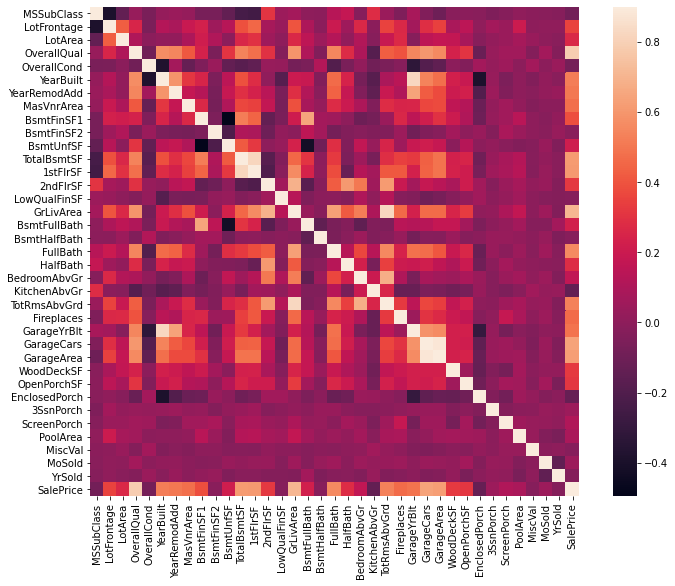

In [8]:
#Heat map to see how features are correlated
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

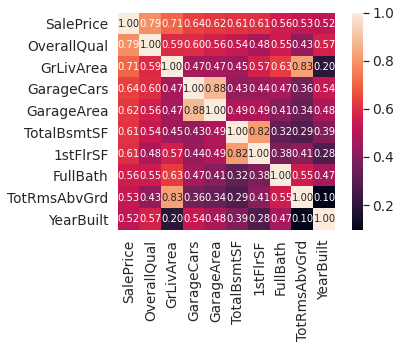

In [9]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Outliers

First, we select what we think the most important features in the prediction of SalePrice to check outliers. 
We have selected: TotalBsmtSF, GrLivArea, TotRmsAbvGrd, OverallQual, GarageArea and YearBuilt thanks to the heat map

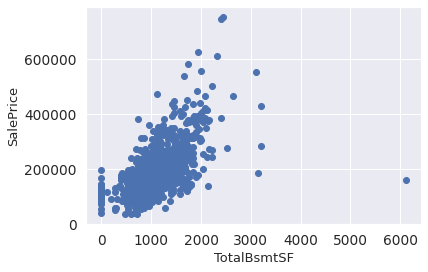

In [10]:
fig, ax = plt.subplots()
feature = "TotalBsmtSF"
ax.scatter(x = train[feature], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel(feature, fontsize=13)
plt.show()

We can see an outlier, we will delete it

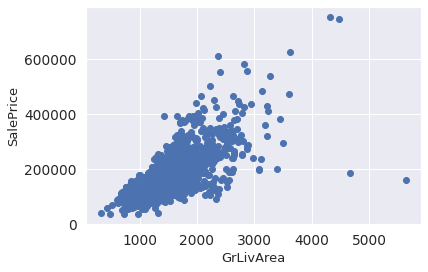

In [11]:
fig, ax = plt.subplots()
feature = "GrLivArea"
ax.scatter(x = train[feature], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel(feature, fontsize=13)
plt.show()

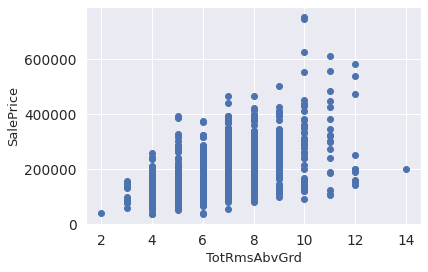

In [12]:
fig, ax = plt.subplots()
feature = "TotRmsAbvGrd"
ax.scatter(x = train[feature], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel(feature, fontsize=13)
plt.show()

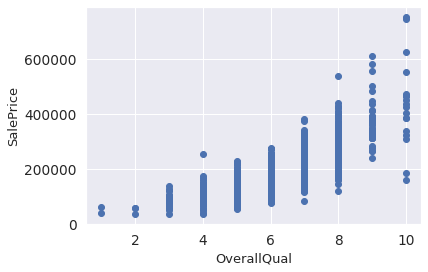

In [13]:
fig, ax = plt.subplots()
feature = "OverallQual"
ax.scatter(x = train[feature], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel(feature, fontsize=13)
plt.show()

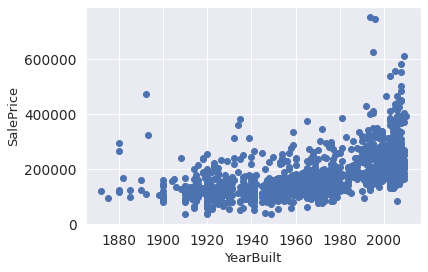

In [14]:
fig, ax = plt.subplots()
feature = "YearBuilt"
ax.scatter(x = train[feature], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel(feature, fontsize=13)
plt.show()

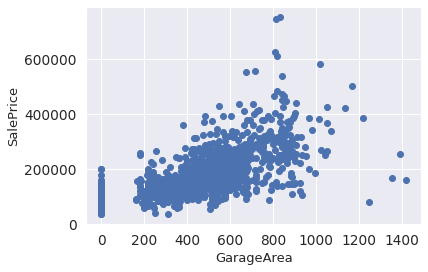

In [15]:
fig, ax = plt.subplots()
feature = "GarageArea"
ax.scatter(x = train[feature], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel(feature, fontsize=13)
plt.show()

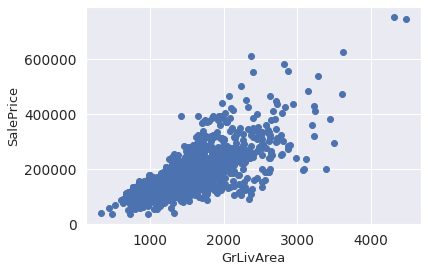

In [16]:
# Delete 5 outliers. We decide to delete them because they are very bad. Otherwise, it's good to keep outliers to have a robust model on outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
train = train.drop(train[(train['GarageArea']>1200) & (train['SalePrice']<300000)].index)
train = train.drop(train[(train['TotalBsmtSF']>5500) & (train['SalePrice']<300000)].index)
#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

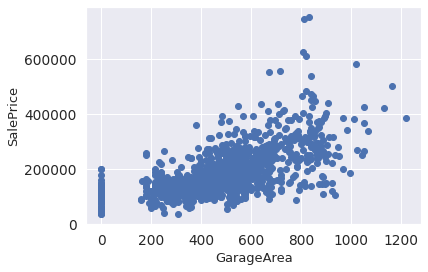

In [17]:
#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GarageArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageArea', fontsize=13)
plt.show()

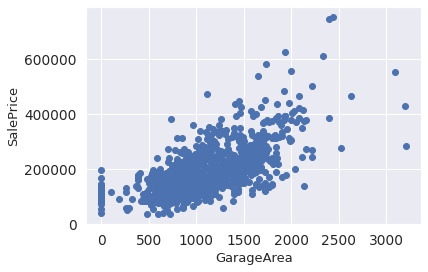

In [18]:
#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['TotalBsmtSF'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageArea', fontsize=13)
plt.show()

### Missing Values

In [19]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2914, 79)


In [20]:
# Print only the columns with missing values
missing_val_count_by_column = (all_data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])  

MSZoning           4
LotFrontage      485
Alley           2716
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1419
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2905
Fence           2343
MiscFeature     2810
SaleType           1
dtype: int64


Due to high number of missing values and pertinence, we can reasonably drop the following features:
- MiscFeature (so MiscVal as well)
- Alley
- PoolQC
- Fence
- FireplaceQu (as there is another feature for fireplace (# of fireplaces)
- GarageType/YrBlt/Finish/Area/Qual/Cond


In [0]:
drop_features = ["MiscFeature", "MiscVal", "Alley", "PoolQC", "Fence", "FireplaceQu", "GarageType", "GarageYrBlt", "GarageFinish", "GarageCars", "GarageQual", "GarageCond"]
all_data = all_data.drop(drop_features, axis = 1)

In [22]:
# Print only the columns with missing values
missing_val_count_by_column = (all_data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

MSZoning          4
LotFrontage     485
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType       24
MasVnrArea       23
BsmtQual         81
BsmtCond         82
BsmtExposure     82
BsmtFinType1     79
BsmtFinSF1        1
BsmtFinType2     80
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
Electrical        1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageArea        1
SaleType          1
dtype: int64


In [0]:
categorical_cols = [cname for cname in all_data.columns if
                    all_data[cname].nunique() < 10 and 
                    all_data[cname].dtype == "object" and
                    all_data[cname].isnull().sum() > 0
                    ]

numerical_cols = [cname for cname in all_data.columns if 
                all_data[cname].dtype in ['int64', 'float64'] and 
                all_data[cname].isnull().sum() > 0
                ]

In [0]:
# Replace by the median and the most frequent values
for feature in categorical_cols:
  all_data[feature] = all_data[feature].fillna(all_data[feature].dropna().mode()[0])

for feature in numerical_cols:
  all_data[feature] = all_data[feature].fillna(all_data[feature].median())

In [25]:
# Check if there are still missing values
missing_val_count_by_column = (all_data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Exterior1st    1
Exterior2nd    1
dtype: int64


In [0]:
# We can delete Exterior variables as they are not very important for price prediction
all_data = all_data.drop(["Exterior1st", "Exterior2nd"], axis=1)

In [27]:
# Check if there are still missing values
missing_val_count_by_column = (all_data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


No more missing values

### Features engineering

We transform the numerical features into categorical features

In [28]:
all_data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,548.0,Y,0,61,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,460.0,Y,298,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,608.0,Y,0,42,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,642.0,Y,0,35,272,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,836.0,Y,192,84,0,0,0,0,12,2008,WD,Normal


In [0]:
# Converting numeric features to categorical features
from sklearn.preprocessing import LabelEncoder

str_cols = ['YrSold','YearRemodAdd','YearBuilt','MoSold','MSSubClass']
for col in str_cols:
    all_data[col] = all_data[col].astype(str)
    label = LabelEncoder()
    arr = label.fit_transform(all_data[col])
    all_data[col] = arr

In [30]:
all_data.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition
0,10,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,110,53,Gable,CompShg,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,548.0,Y,0,61,0,0,0,0,4,2,WD,Normal
1,5,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,83,26,Gable,CompShg,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,460.0,Y,298,0,0,0,0,0,7,1,WD,Normal


In [31]:
# Use this line of code to check the list of the categories per feature for numerical mapping
all_data['SaleType'].unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

In [0]:
# ExterQual = Evaluates the quality of the material on the exterior: Ex(Excellent), Gd(Good), TA(Typical), Fa(Fair), Po(Poor)
all_data["ExterQual"] = all_data['ExterQual'].map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

# ExterCond = Evaluates the present condition of the material on the exterior: Ex(Excellent), Gd(Good), TA(Typical), Fa(Fair), Po(Poor)
all_data["ExterCond"] = all_data['ExterCond'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

# BsmtQual = Evaluates the height of the basement: Ex(Excellent), Gd(Good), TA(Typical), Fa(Fair), Po(Poor), NA(No Basement)
all_data["BsmtQual"] = all_data['BsmtQual'].map({'None':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

# BsmtExposure = Refers to walkout or garden level walls: Gd(Good), Av(Average), Mn(Minimum), No(No Exposure), NA(No Basement)
all_data["BsmtExposure"] = all_data['BsmtExposure'].map({'None':1, 'No':2, 'Av':3, 'Mn':3, 'Gd':4})

# BsmtCond = Evaluates the general condition of the basement: Ex(Excellent), Gd(Good), TA(Typical), Fa(Fair), Po(Poor), NA(No Basement)
all_data["BsmtCond"] = all_data['BsmtCond'].map({'None':1, 'Po':2, 'Fa':3, 'TA':3, 'Gd':4})

# HeatingQC = Heating quality and condition: Ex(Excellent), Gd(Good), TA(Average), Fa(Fair), Po(Poor)
all_data["HeatingQC"] = all_data['HeatingQC'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

# KitchenQual: Kitchen quality: Ex(Excellent), Gd(Good), TA(Typical), Fa(Fair), Po(Poor)
all_data["KitchenQual"] = all_data['KitchenQual'].map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

# PavedDrive: Paved driveway: Y(Padev), P(Partial Pavement), N(Dirt)
all_data["PavedDrive"] = all_data['PavedDrive'].map({'N':1, 'P':2, 'Y':3})


In [33]:
all_data.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition
0,10,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,110,53,Gable,CompShg,BrkFace,196.0,3,3,PConc,4,3,2,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,5,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,3,8,Typ,0,548.0,3,0,61,0,0,0,0,4,2,WD,Normal
1,5,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,83,26,Gable,CompShg,None,0.0,2,3,CBlock,4,3,4,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,5,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,2,6,Typ,1,460.0,3,298,0,0,0,0,0,7,1,WD,Normal


In [0]:
#Feature engineering

# House square feet = First floor square feet + Second floor square feet + Total square feet of basement area
all_data['HouseSF'] = all_data['1stFlrSF'] + all_data['2ndFlrSF'] + all_data['TotalBsmtSF']

# Porch square feet = Three season porch area in square feet + Enclosed porch area in square feet + Screen porch area in square feet
all_data['PorchSF'] = all_data['3SsnPorch'] + all_data['EnclosedPorch'] + all_data['OpenPorchSF'] + all_data['ScreenPorch']

# Total square feet = House square feet + Porch square feet + Garage area
all_data['TotalSF'] = all_data['HouseSF'] + all_data['PorchSF'] + all_data['GarageArea']

In [0]:
all_data = all_data.drop(["1stFlrSF", "2ndFlrSF", "TotalBsmtSF", "3SsnPorch", "EnclosedPorch", "OpenPorchSF", "ScreenPorch","HouseSF", "PorchSF", "GarageArea" ], axis = 1)

In [36]:
all_data.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,PavedDrive,WoodDeckSF,PoolArea,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,10,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,110,53,Gable,CompShg,BrkFace,196.0,3,3,PConc,4,3,2,GLQ,706.0,Unf,0.0,150.0,GasA,5,Y,SBrkr,0,1710,1.0,0.0,2,1,3,1,3,8,Typ,0,3,0,0,4,2,WD,Normal,3175.0
1,5,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,83,26,Gable,CompShg,None,0.0,2,3,CBlock,4,3,4,ALQ,978.0,Unf,0.0,284.0,GasA,5,Y,SBrkr,0,1262,0.0,1.0,2,0,3,1,2,6,Typ,1,3,298,0,7,1,WD,Normal,2984.0


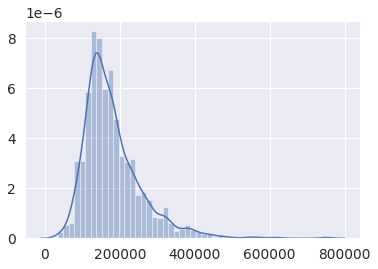

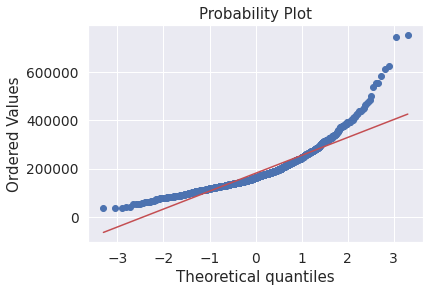

In [37]:
from scipy import stats

#histogram and normal probability plot
sns.distplot(y_train);
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)

In [0]:
#applying log transformation
y_train = np.log(y_train)

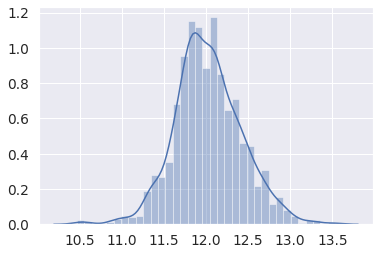

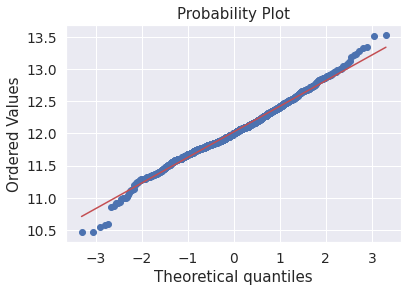

In [39]:
#histogram and normal probability plot
sns.distplot(y_train);
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)

In [0]:
#One hot encoding categorical data

cat_df = all_data.select_dtypes(include=[np.object])

for col in cat_df.columns:
    cat_df = pd.concat([cat_df, pd.get_dummies(cat_df[col], drop_first=True)], axis=1)
    cat_df.drop(col, axis=1, inplace=True)
    
data_encoded = pd.concat([all_data.select_dtypes(include=[np.number]),
    cat_df.drop(cat_df.select_dtypes(include=[np.object]), axis=1)], axis=1)

In [41]:
data_encoded

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,HeatingQC,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,PoolArea,MoSold,YrSold,TotalSF,FV,RH,RL,RM,Pave,IR2,...,Wood,BLQ,GLQ,LwQ,Rec,Unf,BLQ,GLQ,LwQ,Rec,Unf,GasA,GasW,Grav,OthW,Wall,Y,FuseF,FuseP,Mix,SBrkr,Maj2,Min1,Min2,Mod,Sev,Typ,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,10,65.0,8450,7,5,110,53,196.0,3,3,4,3,2,706.0,0.0,150.0,5,0,1710,1.0,0.0,2,1,3,1,3,8,0,3,0,0,4,2,3175.0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,5,80.0,9600,6,8,83,26,0.0,2,3,4,3,4,978.0,0.0,284.0,5,0,1262,0.0,1.0,2,0,3,1,2,6,1,3,298,0,7,1,2984.0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,10,68.0,11250,7,5,108,52,162.0,3,3,4,3,3,486.0,0.0,434.0,5,0,1786,1.0,0.0,2,1,3,1,3,6,1,3,0,0,11,2,3356.0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,11,60.0,9550,7,5,25,20,0.0,2,3,3,4,2,216.0,0.0,540.0,4,0,1717,1.0,0.0,1,0,3,1,3,7,1,3,0,0,4,0,3422.0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,10,84.0,14260,8,5,107,50,350.0,3,3,4,3,3,655.0,0.0,490.0,5,0,2198,1.0,0.0,2,1,4,1,3,9,1,3,192,0,3,2,4263.0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909,2,21.0,1936,4,7,77,20,0.0,2,3,3,3,2,0.0,0.0,546.0,4,0,1092,0.0,0.0,1,1,3,1,2,5,0,3,0,0,8,0,1638.0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2910,2,21.0,1894,4,5,77,20,0.0,2,3,3,3,2,252.0,0.0,294.0,3,0,1092,0.0,0.0,1,1,3,1,2,6,0,3,0,0,6,0,1948.0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2911,5,160.0,20000,5,7,67,46,0.0,2,3,3,3,2,1224.0,0.0,0.0,5,0,1224,1.0,0.0,1,0,4,1,2,7,1,3,474,0,11,0,3024.0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2912,14,62.0,10441,5,5,99,42,0.0,2,3,4,3,3,337.0,0.0,575.0,3,0,970,0.0,1.0,1,0,3,1,2,6,0,3,80,0,9,0,1914.0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


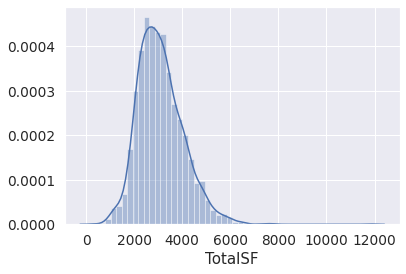

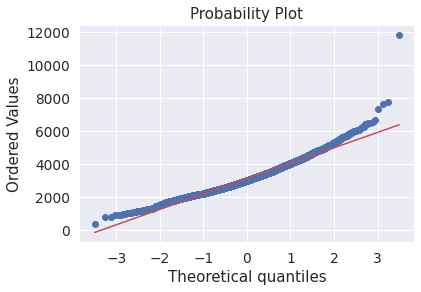

In [42]:
#histogram and normal probability plot
sns.distplot(data_encoded['TotalSF']);
fig = plt.figure()
res = stats.probplot(data_encoded['TotalSF'], plot=plt)

In [0]:
#applying log transformation
data_encoded['TotalSF'] = np.log(data_encoded['TotalSF'])

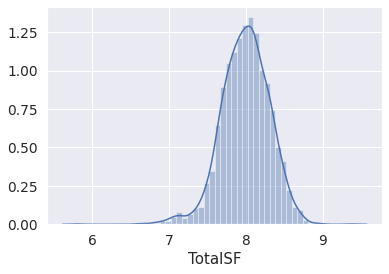

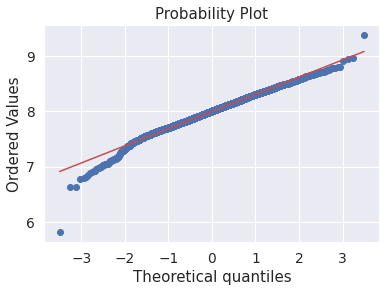

In [44]:
#histogram and normal probability plot
sns.distplot(data_encoded['TotalSF']);
fig = plt.figure()
res = stats.probplot(data_encoded['TotalSF'], plot=plt)

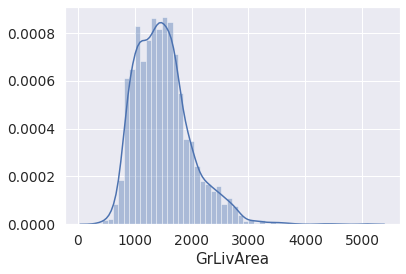

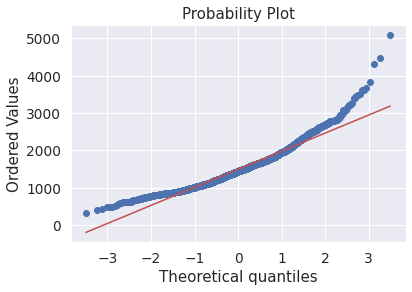

In [45]:
#histogram and normal probability plot
sns.distplot(data_encoded['GrLivArea']);
fig = plt.figure()
res = stats.probplot(data_encoded['GrLivArea'], plot=plt)

In [0]:
#applying log transformation
data_encoded['GrLivArea'] = np.log(data_encoded['GrLivArea'])

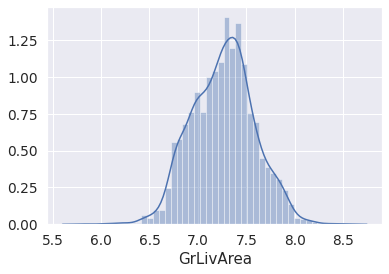

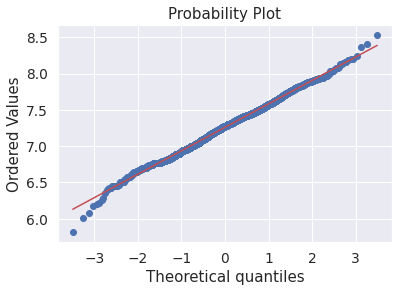

In [47]:
#histogram and normal probability plot
sns.distplot(data_encoded['GrLivArea']);
fig = plt.figure()
res = stats.probplot(data_encoded['GrLivArea'], plot=plt)

In [48]:
data_encoded.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,HeatingQC,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,PoolArea,MoSold,YrSold,TotalSF,FV,RH,RL,RM,Pave,IR2,...,Wood,BLQ,GLQ,LwQ,Rec,Unf,BLQ,GLQ,LwQ,Rec,Unf,GasA,GasW,Grav,OthW,Wall,Y,FuseF,FuseP,Mix,SBrkr,Maj2,Min1,Min2,Mod,Sev,Typ,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,10,65.0,8450,7,5,110,53,196.0,3,3,4,3,2,706.0,0.0,150.0,5,0,7.444249,1.0,0.0,2,1,3,1,3,8,0,3,0,0,4,2,8.063063,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,5,80.0,9600,6,8,83,26,0.0,2,3,4,3,4,978.0,0.0,284.0,5,0,7.140453,0.0,1.0,2,0,3,1,2,6,1,3,298,0,7,1,8.001020,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


### Modeling

In [49]:
data_encoded.shape

(2914, 160)

In [0]:
train = data_encoded[:ntrain]
test = data_encoded[ntrain:]

In [51]:
train.shape, test.shape

((1455, 160), (1459, 160))

In [52]:
# Summarize the X and y variables. Reminder: y_train is normalized by the log function
X = train
y = y_train
X_test = test

X.shape, y.shape, X_test.shape

((1455, 160), (1455,), (1459, 160))

In [0]:
# Using Robust Scaler to transform X_train to be robust to outliers
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()

X_train_scaled = robust_scaler.fit_transform(X)
X_test_scaled = robust_scaler.transform(X_test)  #Do not fit on the test set

In [0]:
# Importing the models
from sklearn.linear_model import LinearRegression, BayesianRidge, ElasticNet, Lasso, SGDRegressor, Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import LinearSVR, SVR
from xgboost import XGBRegressor


# Creating the models
models = [LinearRegression(), SVR(), SGDRegressor(), SGDRegressor(max_iter=1000, tol=1e-3), GradientBoostingRegressor(), RandomForestRegressor(),
             Lasso(), Lasso(alpha=0.01, max_iter=10000), Ridge(), BayesianRidge(alpha_1 = 0.0000001, n_iter= 100), KernelRidge(), KernelRidge(alpha=0.6, kernel='polynomial',degree=2, coef0=2.5),
             ElasticNet(), ElasticNet(alpha=0.001, max_iter=10000), ExtraTreesRegressor(), XGBRegressor(n_estimators=2000, learning_rate=0.05),]

names = ['Linear Regression','Support Vector Regression','Stochastic Gradient Descent','Stochastic Gradient Descent 2','Gradient Boosting Tree','Random Forest',
         'Lasso Regression','Lasso Regression 2','Ridge Regression','Bayesian Ridge Regression','Kernel Ridge Regression','Kernel Ridge Regression 2',
         'Elastic Net Regularization','Elastic Net Regularization 2','Extra Trees Regression', 'XGBBoost']

In [0]:
from sklearn.model_selection import KFold, cross_val_score

# Define a root mean square error function
def rmse(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=7))
    return rmse

In [114]:
print(round(rmse(BayesianRidge(alpha_1 = 5, n_iter= 1000, lambda_1 = 1), X_train_scaled, y).mean(),4))

0.1128


In [61]:
from sklearn.model_selection import KFold, cross_val_score


# Perform 5-folds cross-validation to evaluate the models 
for model, name in zip(models, names):
    # Root mean square error
    score = rmse(model, X_train_scaled, y)
    print(f"- {name}: Mean: {round(score.mean(),3)}, Std: {round(score.std(),3)}")

- Linear Regression: Mean: 0.116, Std: 0.007
- Support Vector Regression: Mean: 0.265, Std: 0.013
- Stochastic Gradient Descent: Mean: 34022101246411.754, Std: 21686280866120.594
- Stochastic Gradient Descent 2: Mean: 48393469220100.375, Std: 30533078712887.47
- Gradient Boosting Tree: Mean: 0.12, Std: 0.011
- Random Forest: Mean: 0.13, Std: 0.009
- Lasso Regression: Mean: 0.399, Std: 0.02
- Lasso Regression 2: Mean: 0.133, Std: 0.009
- Ridge Regression: Mean: 0.113, Std: 0.007
- Bayesian Ridge Regression: Mean: 0.113, Std: 0.007
- Kernel Ridge Regression: Mean: 1.126, Std: 0.049
- Kernel Ridge Regression 2: Mean: 0.152, Std: 0.017
- Elastic Net Regularization: Mean: 0.398, Std: 0.021
- Elastic Net Regularization 2: Mean: 0.115, Std: 0.008
- Extra Trees Regression: Mean: 0.129, Std: 0.009
[18:56:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:56:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:l

### Stacking models

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

In [0]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [0]:
from sklearn.linear_model import Lasso

In [105]:
# Gridsearch for best parameters
from sklearn import model_selection
import math
param_grid = {'alpha_1': [0.5, 1, 0.9],
              'n_iter': [100, 1000, 50]
    
    
              
              } 
 
clf = model_selection.GridSearchCV(BayesianRidge(), param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = 10)
clf.fit(X_train_scaled, y)
print("The best parameters are: ",clf.best_params_)
print("The best score achieved is: ",math.sqrt(-clf.best_score_))

The best parameters are:  {'alpha_1': 1, 'n_iter': 100}
The best score achieved is:  0.1123091077719841


In [149]:
# We average the following models
ENet = ElasticNet(alpha=0.001, l1_ratio=.1, random_state=3)
GBoost = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.1)
KRR = KernelRidge(alpha=0.6, kernel='sigmoid', degree=2, coef0=2.5)
#Lasso = Lasso(alpha =0.0001, random_state=1)
Bayes = BayesianRidge(alpha_1 = 1, n_iter= 100)

averaged_models = AveragingModels(models = (ENet, GBoost, KRR, Bayes))

score = rmse(averaged_models, X_train_scaled, y)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1187 (0.0099)



In [0]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
          for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)


In [151]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = Bayes)

score = rmse(stacked_averaged_models, X_train_scaled, y)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1083 (0.0085)


# We add XGBoost and LightGBM to our averaged model


In [0]:
# Prediction from the averaged model
stacked_averaged_models.fit(X_train_scaled, y)
y_avg_pred = np.exp(stacked_averaged_models.predict(X_test_scaled))

In [0]:
# Prediction from the XGBoost
import xgboost as xgb
model_xgb = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=0, missing=None, n_estimators=4000,
             n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0.0001, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

model_xgb.fit(X_train_scaled, y)
y_xgb_pred = np.exp(model_xgb.predict(X_test_scaled))

In [0]:
# Prediction from the LightGBM
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

model_lgb.fit(X_train_scaled, y)
y_lgb_pred = np.exp(model_lgb.predict(X_test_scaled))

In [154]:
# Average the predictions
ensemble = y_avg_pred*0.50 + y_xgb_pred*0.20 + y_lgb_pred*0.30
ensemble

array([127380.06829668, 163457.6186641 , 185933.5709158 , ...,
       171264.30389497, 119408.84489997, 216260.60979147])

In [155]:
# Save predictions in format used for competition scoring
output = pd.DataFrame({'Id': test_ID,
                       'SalePrice': ensemble})
output.to_csv('submission.csv', index=False)

print("Your submission was successfully saved!")

Your submission was successfully saved!


In [74]:
"""# Fit final model
model = averaged_models
model.fit(X_train_scaled, y)

# Generate predictions on test
y_pred = np.exp(model.predict(X_test_scaled))

# Save predictions in format used for competition scoring
output = pd.DataFrame({'Id': test_ID,
                       'SalePrice': y_pred})
output.to_csv('submission.csv', index=False)

print("Your submission was successfully saved!") """

'# Fit final model\nmodel = averaged_models\nmodel.fit(X_train_scaled, y)\n\n# Generate predictions on test\ny_pred = np.exp(model.predict(X_test_scaled))\n\n# Save predictions in format used for competition scoring\noutput = pd.DataFrame({\'Id\': test_ID,\n                       \'SalePrice\': y_pred})\noutput.to_csv(\'submission.csv\', index=False)\n\nprint("Your submission was successfully saved!") '